In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-colorblind')


In [2]:
# Load dataset (update file path if necessary)
df = pd.read_csv("Netflix Dataset.csv")

# Display first 5 rows
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Shape, columns, and info
print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nDataset Info:")
print(df.info())


Shape of dataset: (7789, 11)

Column Names:
 ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None



Missing values per column:

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


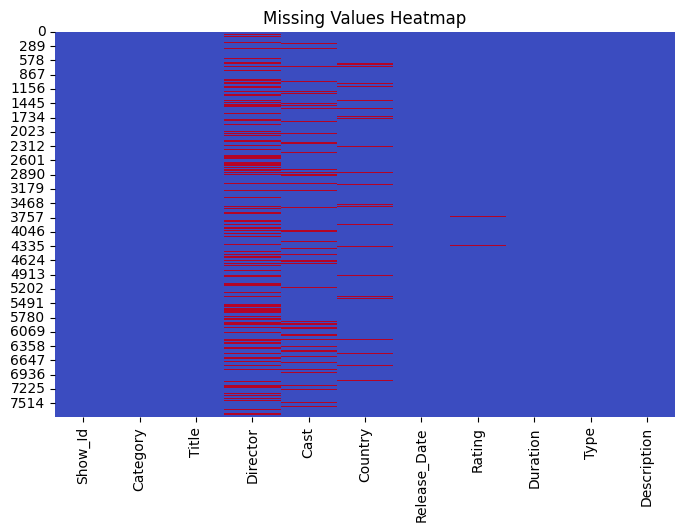

In [4]:
# Check missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Visualize missing data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


In [17]:
# Clean missing values safely
df = df.fillna({
    'Director': 'Unknown',
    'Cast': 'Unknown',
    'Country': 'Unknown',
    'Rating': 'Not Rated'
})

# Extract Year from Release_Date
df['Year'] = df['Release_Date'].astype(str).str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

# Check cleaned data
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [6]:
# General statistics
print(df.describe(include='all'))

# Category (Movie vs TV Show) counts
print("\nCategory Counts:")
print(df['Category'].value_counts())


       Show_Id Category              Title Director     Cast        Country  \
count     7789     7789               7789     7789     7789           7789   
unique    7787        2               7787     4051     6832            682   
top      s6621    Movie  The Lost Okoroshi  Unknown  Unknown  United States   
freq         2     5379                  2     2388      718           2556   
mean       NaN      NaN                NaN      NaN      NaN            NaN   
std        NaN      NaN                NaN      NaN      NaN            NaN   
min        NaN      NaN                NaN      NaN      NaN            NaN   
25%        NaN      NaN                NaN      NaN      NaN            NaN   
50%        NaN      NaN                NaN      NaN      NaN            NaN   
75%        NaN      NaN                NaN      NaN      NaN            NaN   
max        NaN      NaN                NaN      NaN      NaN            NaN   

           Release_Date Rating  Duration           

/tmp/ipython-input-1855638786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


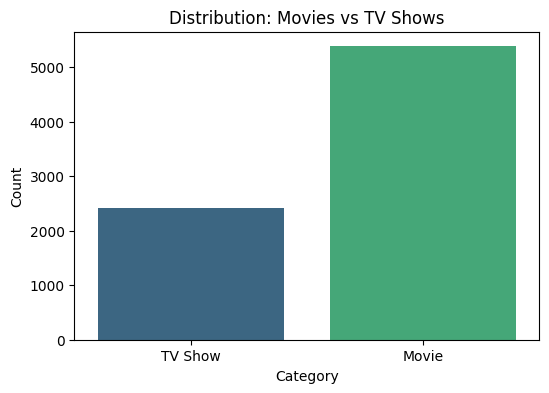

In [7]:
# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title("Distribution: Movies vs TV Shows")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


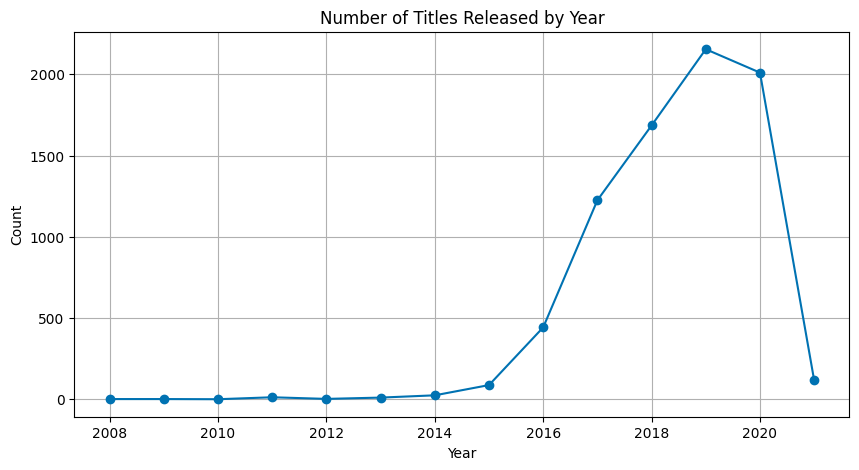

In [8]:
# Filter valid years only
df_year = df[df['Year'] > 0]

plt.figure(figsize=(10,5))
df_year['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of Titles Released by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Country
United States     3298
India              990
United Kingdom     723
Unknown            507
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Name: count, dtype: int64


/tmp/ipython-input-1135811188.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='cool')


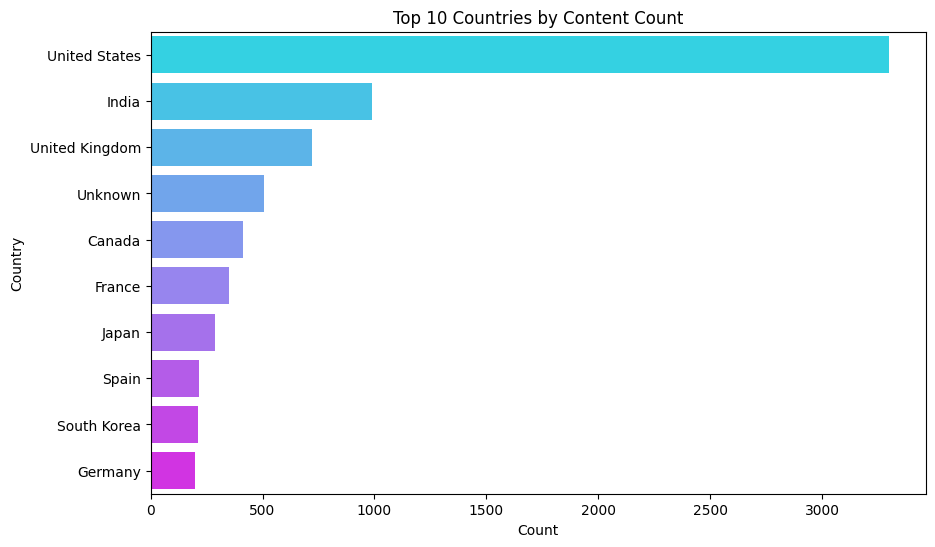

In [9]:
# Explode countries if multiple
df_country = df.copy()
df_country['Country'] = df_country['Country'].astype(str)
df_country = df_country.assign(Country=df_country['Country'].str.split(',')).explode('Country')
df_country['Country'] = df_country['Country'].str.strip()

# Count and visualize
top_countries = df_country['Country'].value_counts().head(10)
print(top_countries)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cool')
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


Type
International Movies        2437
Dramas                      2108
Comedies                    1472
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64


/tmp/ipython-input-1031740263.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')


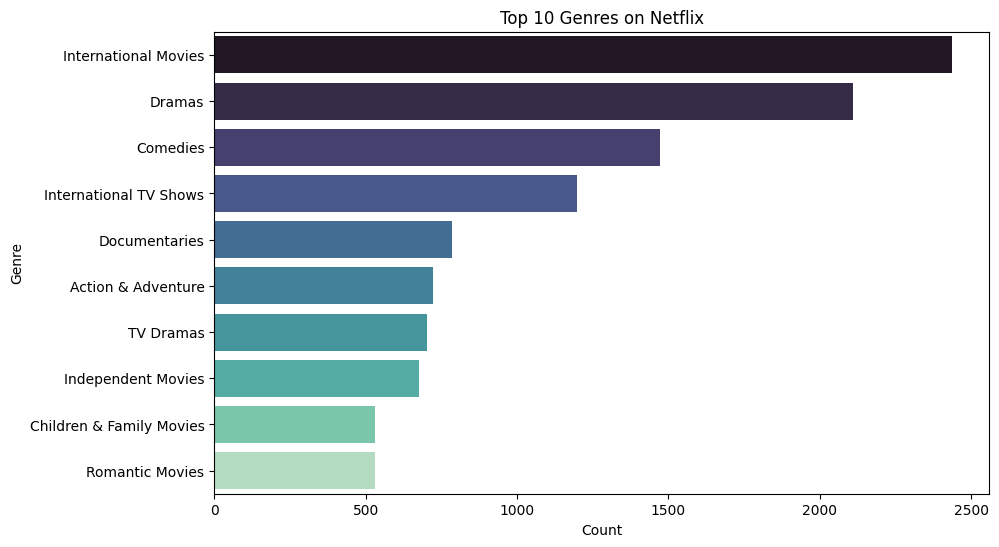

In [10]:
# Split Type column into genres
df_genre = df.copy()
df_genre['Type'] = df_genre['Type'].astype(str)
df_genre = df_genre.assign(Type=df_genre['Type'].str.split(',')).explode('Type')
df_genre['Type'] = df_genre['Type'].str.strip()

# Count top genres
top_genres = df_genre['Type'].value_counts().head(10)
print(top_genres)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


/tmp/ipython-input-2421166689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Duration'] = movies['Duration'].str.replace(' min', '').astype(float)


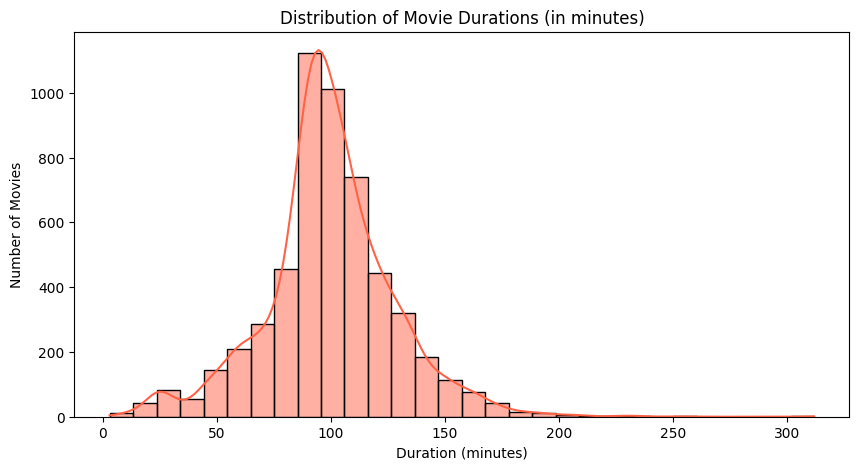

In [11]:
movies = df[df['Category'] == 'Movie']
movies['Duration'] = movies['Duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(movies['Duration'].dropna(), bins=30, kde=True, color='tomato')
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


Director
Unknown                   2388
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64


/tmp/ipython-input-1661434547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


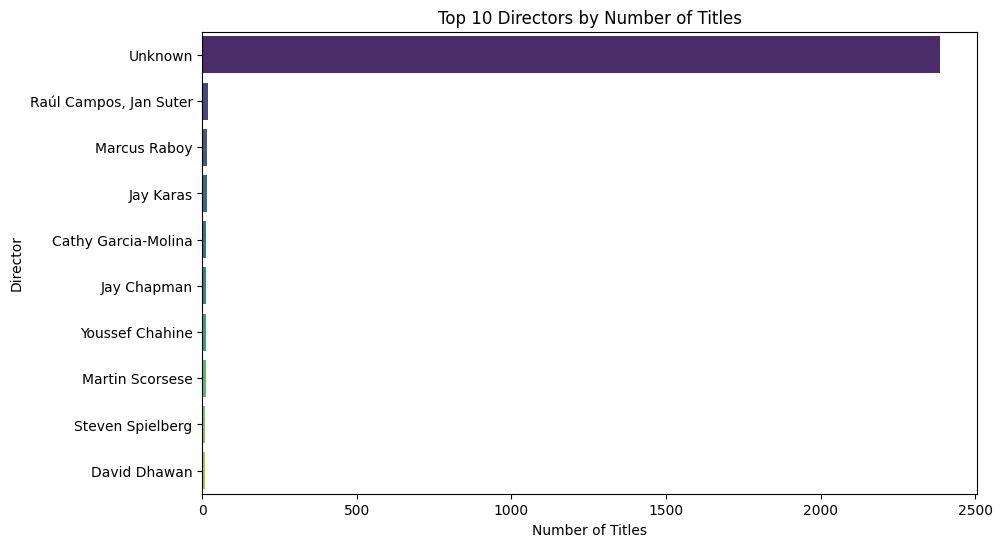

In [12]:
top_directors = df['Director'].value_counts().head(10)
print(top_directors)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


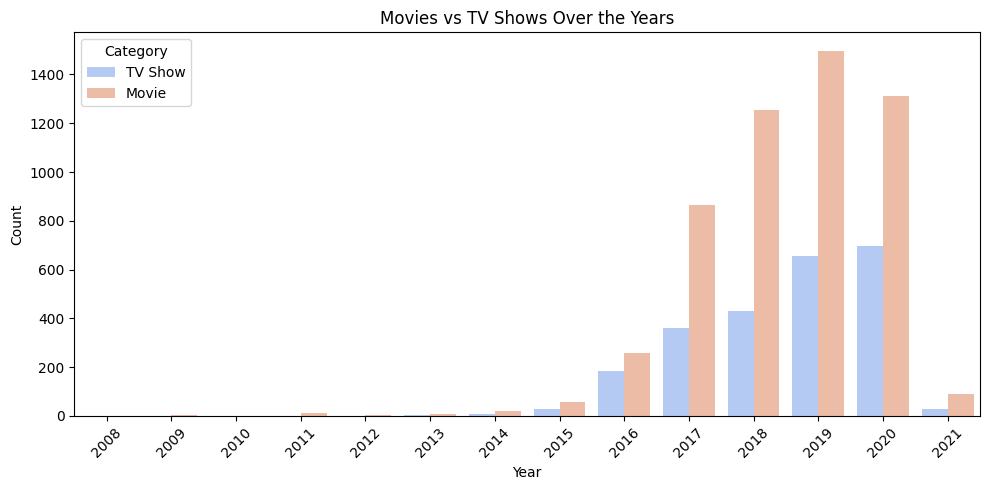

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_year, x='Year', hue='Category', palette='coolwarm')
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


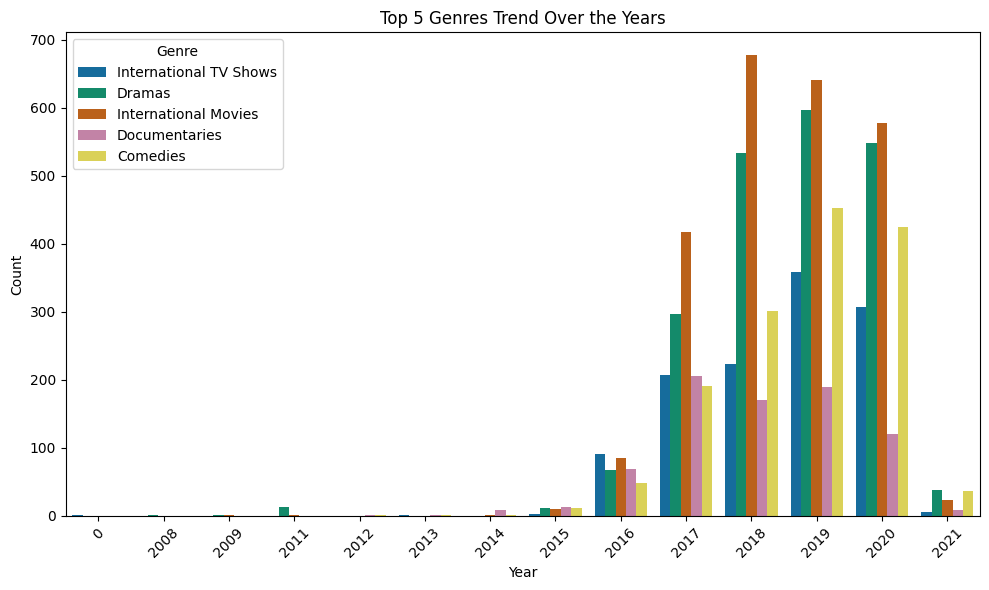

In [14]:
# Select top 5 genres
top5 = df_genre['Type'].value_counts().head(5).index
df_top5 = df_genre[df_genre['Type'].isin(top5)]

plt.figure(figsize=(10,6))
sns.countplot(data=df_top5, x='Year', hue='Type')
plt.title("Top 5 Genres Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
print("📊 FINAL INSIGHTS AND STRATEGIC RECOMMENDATIONS:\n")
print("1️⃣ Netflix's content library is dominated by Movies (~69%) compared to TV Shows (~31%).")
print("2️⃣ Dramas, Comedies, and International Movies are the most popular genres globally.")
print("3️⃣ The U.S., India, and the U.K. contribute the majority of Netflix content.")
print("4️⃣ There has been steady growth in TV Shows since 2015, indicating strong audience demand for series.")
print("5️⃣ Netflix should focus on localized content in non-English-speaking countries to expand global reach.")
print("6️⃣ Documentaries and Regional Cinema categories are growing opportunities.")
print("7️⃣ Directors with multiple titles can be prioritized for future productions.")


📊 FINAL INSIGHTS AND STRATEGIC RECOMMENDATIONS:

1️⃣ Netflix's content library is dominated by Movies (~69%) compared to TV Shows (~31%).
2️⃣ Dramas, Comedies, and International Movies are the most popular genres globally.
3️⃣ The U.S., India, and the U.K. contribute the majority of Netflix content.
4️⃣ There has been steady growth in TV Shows since 2015, indicating strong audience demand for series.
5️⃣ Netflix should focus on localized content in non-English-speaking countries to expand global reach.
6️⃣ Documentaries and Regional Cinema categories are growing opportunities.
7️⃣ Directors with multiple titles can be prioritized for future productions.
